# Penmanshiel SCADA merge_missingvalues

### The purpose of this notebook: 
### 1. To compile all of the turbine data together into a singel power signal output for the entire wind farm.
### 2. To impute estimates for missing values using k-NN method.

Penmanshiel SCADA data - Grantshouse, Scotland:
14 turbines - Senvion MM82

In [2]:
# 15Mar2024
# @Deignan

import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer
from datetime import datetime
import zipfile

specific_column = 'Power (kW)'
date_column = '# Date and time'

# Data Merging

In [ ]:

# read_and_filter_excel
def read_and_filter_excel(file_path, specific_column, date_column):
    # Read the Excel file
    df = pd.read_csv(file_path, sep=',', skiprows = 9,  usecols=[specific_column, date_column] )

    df[date_column] = pd.to_datetime(df[date_column])
    sorted_df = df.sort_values(by=date_column)

    return sorted_df

# read_zip
def read_zip(file_path_zip):
    
    combined_data = pd.DataFrame()
    zf_open = zipfile.ZipFile(file_path_zip, mode = 'r')
    count = 0
    
    for filename in zf_open.namelist():
        if filename.startswith('Turbine'):
            
            print("filename = ", filename)
            with zf_open.open(filename) as f:
                
                 df_final = read_and_filter_excel(f, specific_column, date_column)
            
            count +=1
            df_final[date_column] = pd.to_datetime(df_final[date_column])
            sorted_df = df_final.sort_values(by=date_column)
            
            combined_data = pd.concat([combined_data, sorted_df], ignore_index=True)   
            #print("combined_data = ",combined_data)   
    
    return combined_data, count



In [11]:

pattern_zip = f".\\Penmanshiel SCADA\\Penmanshiel*.zip"
files_zip = glob.glob(pattern_zip)

combined_data_final = pd.DataFrame()

count = 0
for file_zip in files_zip:
    print(f"Processing file: {file_zip}")
    zf, zipcount = read_zip(file_zip)
    #print(zf)
    
    combined_data_final = pd.concat([combined_data_final, zf], ignore_index=True) 
    combined_data_final = combined_data_final.sort_values(by=date_column) 
    #print("combined_data_final = ",combined_data_final)
    count += zipcount

combined_data_final_sorted = combined_data_final.sort_values(by=date_column)
print(f"Processing complete. {count} files processed")    



Processing file: .\Penmanshiel SCADA\Penmanshiel_SCADA_2017_WT01-10_3114.zip
filename =  Turbine_Data_Penmanshiel_01_2017-01-01_-_2018-01-01_1042.csv
filename =  Turbine_Data_Penmanshiel_02_2017-01-01_-_2018-01-01_1043.csv
filename =  Turbine_Data_Penmanshiel_04_2017-01-01_-_2018-01-01_1044.csv
filename =  Turbine_Data_Penmanshiel_05_2017-01-01_-_2018-01-01_1045.csv
filename =  Turbine_Data_Penmanshiel_06_2017-01-01_-_2018-01-01_1046.csv
filename =  Turbine_Data_Penmanshiel_07_2017-01-01_-_2018-01-01_1047.csv
filename =  Turbine_Data_Penmanshiel_08_2017-01-01_-_2018-01-01_1048.csv
filename =  Turbine_Data_Penmanshiel_09_2017-01-01_-_2018-01-01_1049.csv
filename =  Turbine_Data_Penmanshiel_10_2017-01-01_-_2018-01-01_1050.csv
Processing file: .\Penmanshiel SCADA\Penmanshiel_SCADA_2017_WT11-15_3115.zip
filename =  Turbine_Data_Penmanshiel_11_2017-01-01_-_2018-01-01_1051.csv
filename =  Turbine_Data_Penmanshiel_12_2017-01-01_-_2018-01-01_1052.csv
filename =  Turbine_Data_Penmanshiel_13_201

In [15]:
# 1102752
# print(combined_data)


sorted_df = combined_data_final_sorted.sort_values(by=date_column)
print('Total number of values:', len(sorted_df))

sorted_df = sorted_df.reset_index(drop = True)
print("sorted_df = ",sorted_df)

null_count = sorted_df.isnull().sum().sum()  
print('Number of null values:', null_count)

print('Percentage of missing values:', format(null_count/len(combined_data_final_sorted),".2%"))

# sorted_df_null_slice = sorted_df.iloc[500000:600000].isnull().sum().sum()
# print("SUM - sorted_df_null_slice = ", sorted_df_null_slice)

# null_sorted_values = sorted_df[sorted_df['Power (kW)'].isnull()]
# print("null_sorted_values = ", null_sorted_values)

# null_sorted_df = sorted_df[sorted_df['Power (kW)'].isna()]
# print(null_sorted_df.head(50))

# # sorted_df.head(50)


# null_aggregated_data = aggregated_data[aggregated_data['Power (kW)'].isnull()]
# print("null_aggregated_data = ",null_aggregated_data)

# print("number of values = ", len(aggregated_data),",365 x 3 days total (3 years), divide and get 144 values per day (10 min res)")



Total number of values: 2207520
sorted_df =              # Date and time  Power (kW)
0       2017-01-01 00:00:00  658.320007
1       2017-01-01 00:00:00  917.929993
2       2017-01-01 00:00:00   -2.360000
3       2017-01-01 00:00:00  736.349976
4       2017-01-01 00:00:00  862.440002
...                     ...         ...
2207515 2019-12-31 23:50:00   19.145282
2207516 2019-12-31 23:50:00  181.091107
2207517 2019-12-31 23:50:00   -2.346333
2207518 2019-12-31 23:50:00   69.134151
2207519 2019-12-31 23:50:00  104.494537

[2207520 rows x 2 columns]
Number of null values: 12981
Percentage of missing values: 0.59%


aggregated_data =                         Power (kW)
# Date and time                  
2017-01-01 00:00:00   8669.929978
2017-01-01 00:10:00   9960.439940
2017-01-01 00:20:00  13524.410126
2017-01-01 00:30:00  12923.029834
2017-01-01 00:40:00  13333.449916
...                           ...
2019-12-31 23:10:00   3949.769825
2019-12-31 23:20:00   1658.322308
2019-12-31 23:30:00   1686.596455
2019-12-31 23:40:00   1712.493710
2019-12-31 23:50:00    620.713792

[157680 rows x 1 columns]
total values in aggreagated_data =  157680


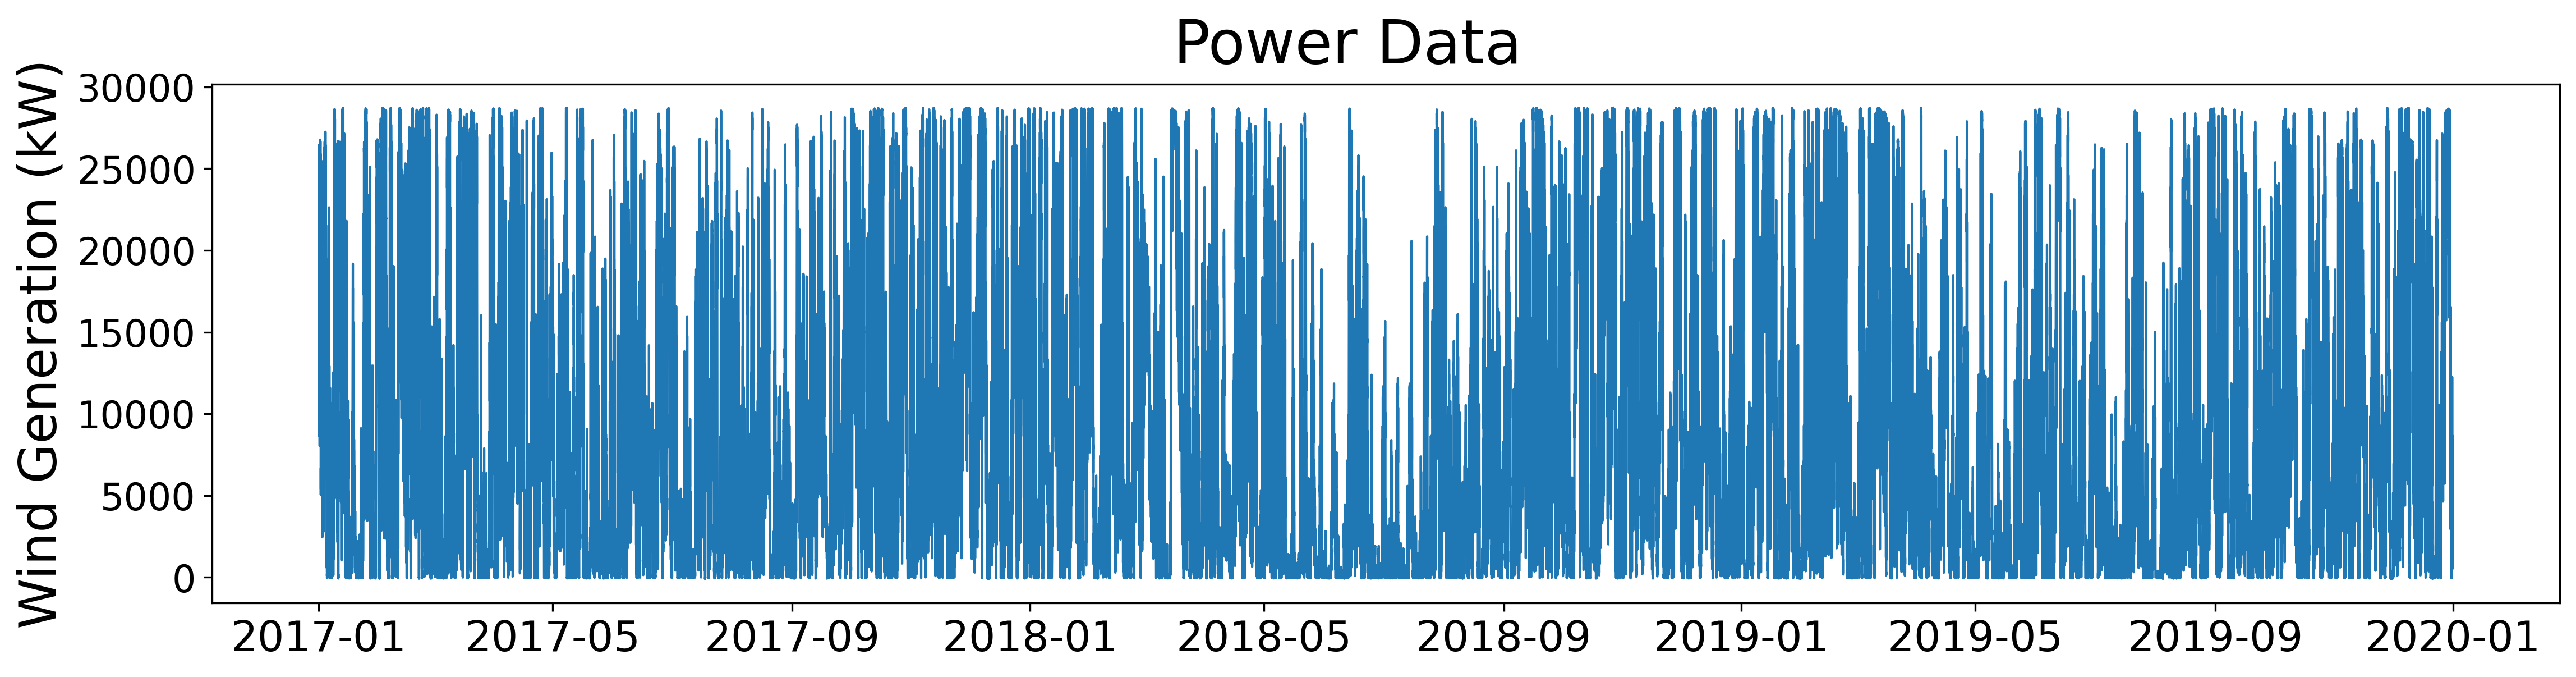

In [19]:
plt.rcParams['figure.dpi'] = 300

aggregated_data = sorted_df.groupby("# Date and time")["Power (kW)"].sum().reset_index()
aggregated_data.set_index('# Date and time', inplace=True)
print("aggregated_data = ",aggregated_data)

fig = plt.figure(figsize = [18,4])
fig.suptitle('Power Data', fontsize=26)

for a in range(1):
    ax = fig.add_subplot(1, 1, a+1) 
    ax.plot(aggregated_data['Power (kW)'], linewidth = 1)
#     plt.subplots_adjust(hspace=0.5)
    ax.set_ylabel("Wind Generation (kW)", fontsize = 22)
#     ax.title.set_text('Dataset ' + str(a))
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)

print("total values in aggreagated_data = ",len(aggregated_data['Power (kW)']))


# Missing values imputation

In [20]:
# MISSING VALUES IMPUTATION 

data_missing = sorted_df
data_missing_copy = data_missing.copy()

columns_to_exclude = ['# Date and time']
data_to_impute = data_missing.drop(columns=columns_to_exclude)
print("data_to_impute = =",data_to_impute)

whatev1 = np.float32(data_to_impute['Power (kW)'])
nested_array = np.array([[item] for item in whatev1])
# print("nested_array = ",nested_array)
# print("len(nested_array) = ", len(nested_array))

# X_12 = [[1],[2],[np.nan],[4]]
X_12 = nested_array[:1000000]

# X_12 = nested_array
# print("X_12 = ",X_12)
# print("len(X_12) = ",len(X_12))
print("start: ",datetime.now())

imputer = KNNImputer(n_neighbors=2, weights="uniform")
output = imputer.fit_transform(X_12)

# print("output  =",output)
print("len(output) = ",len(output))
print("end: ",datetime.now())

data_to_impute = =          Power (kW)
0        658.320007
1        917.929993
2         -2.360000
3        736.349976
4        862.440002
...             ...
2207515   19.145282
2207516  181.091107
2207517   -2.346333
2207518   69.134151
2207519  104.494537

[2207520 rows x 1 columns]
start:  2024-03-15 15:43:02.389553
len(output) =  1000000
end:  2024-03-15 15:45:49.147780


In [21]:
X_13 = nested_array[1000000:1500000]

# print("X_13 = ",X_13)
print("len(X_13) = ",len(X_13))
print("start: ",datetime.now())

imputer = KNNImputer(n_neighbors=2, weights="uniform")
output_2 = imputer.fit_transform(X_13)

# print("output  =",output_2)
print("len(output) = ",len(output_2))
print("end: ",datetime.now())

len(X_13) =  500000
start:  2024-03-15 15:46:12.714701
len(output) =  500000
end:  2024-03-15 15:47:29.765134


In [22]:
X_14 = nested_array[1500000:2207520]

# print("X_14 = ",X_14)
print("len(X_14) = ",len(X_14))
print("start: ",datetime.now())

imputer = KNNImputer(n_neighbors=2, weights="uniform")
output_3 = imputer.fit_transform(X_14)

# print("output  =",output_3)
print("len(output) = ",len(output_3))
print("end: ",datetime.now())

len(X_14) =  707520
start:  2024-03-15 15:48:16.087712
len(output) =  707520
end:  2024-03-15 15:52:46.337750


In [23]:
output_flat1 = output.flatten('F')
output_flat1 = pd.DataFrame(output_flat1)
# print(output_flat1)

output_flat2 = output_2.flatten('F')
output_flat2 = pd.DataFrame(output_flat2)
# print(output_flat2)

output_flat3 = output_3.flatten('F')
output_flat3 = pd.DataFrame(output_flat3)
# print(output_flat3)

output_total = pd.concat([output_flat1, output_flat2, output_flat3], ignore_index = True)
print("output_total = ",output_total)

null_count_output = output_total[0].isna().sum().sum()  
print('Number of null values = ', null_count_output)

# null_sorted_values_output = output_total.isna()
# print("null_sorted_values = ", null_sorted_values_output)

output_total =                    0
0        658.320007
1        917.929993
2         -2.360000
3        736.349976
4        862.440002
...             ...
2207515   19.145281
2207516  181.091110
2207517   -2.346333
2207518   69.134148
2207519  104.494537

[2207520 rows x 1 columns]
Number of null values =  0


In [24]:
data_filled = data_missing_copy
# print(data_filled)

null_count_data_filled = data_filled.isnull().sum().sum()  
print('null_count_data_filled = ', null_count_data_filled)

data_filled['Power (kW)'] = output_total[0]
# data_filled.iloc[0:500]

print("data_filled = ", data_filled)

null_count_output_filled = data_filled['Power (kW)'].isna().sum().sum()  
print('Current number of null values = ', null_count_output_filled)

null_count_data_filled =  12981
data_filled =              # Date and time  Power (kW)
0       2017-01-01 00:00:00  658.320007
1       2017-01-01 00:00:00  917.929993
2       2017-01-01 00:00:00   -2.360000
3       2017-01-01 00:00:00  736.349976
4       2017-01-01 00:00:00  862.440002
...                     ...         ...
2207515 2019-12-31 23:50:00   19.145281
2207516 2019-12-31 23:50:00  181.091110
2207517 2019-12-31 23:50:00   -2.346333
2207518 2019-12-31 23:50:00   69.134148
2207519 2019-12-31 23:50:00  104.494537

[2207520 rows x 2 columns]
Current number of null values =  0


In [25]:
aggregated_data = data_filled.groupby("# Date and time")["Power (kW)"].sum().reset_index()
aggregated_data.set_index('# Date and time', inplace=True)
print("aggregated_data = ",aggregated_data)

null_aggregated_data = aggregated_data[aggregated_data['Power (kW)'].isnull()]
print("null_aggregated_data = ",null_aggregated_data)

print("number of values = ", len(aggregated_data),",365 x 3 days total (3 years), divide and get 144 values per day (10 min res)")



aggregated_data =                         Power (kW)
# Date and time                  
2017-01-01 00:00:00   8669.929688
2017-01-01 00:10:00   9960.439453
2017-01-01 00:20:00  13524.410156
2017-01-01 00:30:00  12923.030273
2017-01-01 00:40:00  13333.450195
...                           ...
2019-12-31 23:10:00   3949.769775
2019-12-31 23:20:00   1658.322266
2019-12-31 23:30:00   1686.596436
2019-12-31 23:40:00   1712.493652
2019-12-31 23:50:00    620.713806

[157680 rows x 1 columns]
null_aggregated_data =  Empty DataFrame
Columns: [Power (kW)]
Index: []
number of values =  157680 ,365 x 3 days total (3 years), divide and get 144 values per day (10 min res)


In [26]:
# save the file
aggregated_data.to_csv('Penmanshiel_data_imputed.csv', index=True)
